In [1]:
#installing required libraries
!pip install bs4
!pip install pandas

In [37]:
#importing the required packages
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs
from urllib.request import urlopen as uReq

In [55]:
import datetime
from datetime import datetime

In [171]:
#initializing the url which is to be scraped
base_url="https://www.noon.com/uae-en/sports-and-outdoors/exercise-and-fitness/yoga-16328/?limit=50&page=1&sort%5Bby%5D=popularity&sort%5Bdir%5D=desc"

In [172]:
#List to hold all containers across pages
all_containers = []

for page in range(1, 5):
    # Construct the page URL
    url = f"{base_url}?page={page}"
    uClient = uReq(url)
    page_html = uClient.read()

    soup = BeautifulSoup(page_html, "html.parser")

    # Find product containers and add them to the list
    containers = soup.find_all("div", {"class": "sc-19767e73-0"})
    all_containers.extend(containers)

In [173]:
#calculating the current date
current_date = datetime.now().strftime('%-d-%-m-%Y')

In [203]:
all_products = []
for product in all_containers:
    #extracting name
    name =product.find("div", class_="sc-66eca60f-24").get_text(strip=True) if product.find("div", class_="sc-66eca60f-24") else 'No name'
    brand = name.split()[0]
    name = ' '.join(name.split()[1:])

    #extracting price
    price = product.find("strong", class_="amount").get_text(strip=True) if product.find("strong", class_="amount") else 'No price'
    price = price.replace(',', '')

    #exracting rating
    rating = product.find("div", class_="sc-9cb63f72-2").get_text(strip=True) if product.find("div", class_="sc-9cb63f72-2") else '0'

    #extracting rating count
    rating_count = product.find("span", class_="sc-9cb63f72-5 DkxLK").get_text(strip=True) if product.find("span", class_="sc-9cb63f72-5 DkxLK") else '0'

    #extracting sponsored and express
    sponsored = 'Y' if product.find("div", class_="sc-66eca60f-23") else 'N'
    express = 'Y' if product.find("img", class_="sc-92fbb12b-1") else 'N'

    #extracting discount and sales price
    discount_text = product.find("span", class_="discount").get_text(strip=True) if product.find("span", class_="discount") else '0% off'
    discount_percentage = int(discount_text.split('%')[0]) if '%' in discount_text else 0
    sales_price = float(price) * (1 - (discount_percentage / 100))

    #extracting link
    link ="https://www.noon.com"+product.find("a")["href"] if product.find("a") else 'No link'
    parsed_url = urlparse(link)

    #extracing sku
    sku = parsed_url.path.split("/")[3] if parsed_url.path else 'No SKU'
    #adding product details to list of all products
    all_products.append({
        'Date': current_date,
        'SKU': sku,
        'Name': name,
        'Brand': brand,
        'Average Rating': rating,
        'Rating Count': rating_count,
        'Sponsored': sponsored,
        'Price': round(float(price), 2),
        'Sales Price': sales_price,
        'Express': express,
        'Link': link,
        'Discount': discount_text
    })

In [204]:
#creatiing dataframe with the Lists
df = pd.DataFrame(all_products)

In [205]:
df

,Date,SKU,Name,Brand,Average Rating,Rating Count,Sponsored,Price,Sales Price,Express,Link,Discount
0,6-10-2024,N42326497A,Adjustable Anti-Gravity Home Aerial Yoga Hammo...,Generic,0,0,Y,182.00,63.700,Y,https://www.noon.com/uae-en/adjustable-anti-gr...,65% Off
1,6-10-2024,Z1FFBA90CF03B4E1CDF5CZ,"Mahmir® EVA Foam Roller for Yoga, Deep Tissue ...",MahMir,3.1,3,Y,29.95,29.950,Y,https://www.noon.com/uae-en/mahmir-eva-foam-ro...,0% off
2,6-10-2024,Z6AA422C01041A12BF086Z,Extra Thick High Density Anti-Tear Exercise Yo...,Generic,5.0,2,Y,29.00,1.450,Y,https://www.noon.com/uae-en/extra-thick-high-d...,95% Off
3,6-10-2024,Z24E1B5B4FDE8BB5C6111Z,8MM Yoga Mat with Carrying Strap Anti-Slip for...,Bernessi,4.8,49,N,69.90,30.057,Y,https://www.noon.com/uae-en/8mm-yoga-mat-with-...,57% Off
4,6-10-2024,ZB6A26C6FF922D524ABBAZ,MahMir Yoga Mat Anti-Slip Exercise Mat with Ca...,MahMir,5.0,11,N,47.45,37.960,Y,https://www.noon.com/uae-en/mahmir-yoga-mat-an...,20% Off
...,...,...,...,...,...,...,...,...,...,...,...,...
248,6-10-2024,N34539642A,mat Foldable Non-Slip Yoga Mat…,yoga,4.8,26,N,30.05,25.843,Y,https://www.noon.com/uae-en/foldable-non-slip-...,14% Off
249,6-10-2024,ZC462B190BD7C61A1331AZ,2Mm Foldable Cranberry Point Yoga Mat…,Gaiam,5.0,1,N,39.00,12.480,Y,https://www.noon.com/uae-en/2mm-foldable-cranb...,68% Off
250,6-10-2024,N48797189A,Baby Yoga Foam Roller…,Cool,4.4,14,N,42.25,15.210,Y,https://www.noon.com/uae-en/yoga-foam-roller/N...,64% Off
251,6-10-2024,ZF12EE3B5F1EF3A193C60Z,MELA Non-Slip Yoga Mat for Home Gym - 6mm Thic...,MELA,0,0,N,79.95,54.366,Y,https://www.noon.com/uae-en/mela-non-slip-yoga...,32% Off


In [206]:
#dataframe statistics
df.describe()

,Price,Sales Price
count,253.000000,253.000000
mean,62.021344,45.822937
std,269.478399,245.308086
min,9.400000,1.450000
25%,29.950000,19.966500
50%,36.000000,29.400000
75%,49.950000,35.964000
max,4311.000000,3923.010000


In [207]:
#saving the dataframe into csv file
df.to_csv('noon_yoga_products_all_pages.csv', index=False)

In [198]:
# details of most expensive product
most_expensive = df.loc[df['Price'].idxmax()]
print("Most Expensive Product:")
print(most_expensive)

Most Expensive Product:
Date                                                      6-10-2024
SKU                                          ZC252AE4B171F6F4B24C7Z
Name              Baby Style COOLBABY Pilates Multifunctional Yo...
Brand                                                          Cool
Average Rating                                                    0
Rating Count                                                      0
Sponsored                                                        No
Price                                                        4311.0
Sales Price                                                 3923.01
Express                                                         Yes
Link              https://www.noon.com/uae-en/coolbaby-pilates-m...
Discount                                                     9% Off
Name: 182, dtype: object


In [199]:
#details of cheapest product
cheapest = df.loc[df['Price'].idxmin()]
print("\nCheapest Product:")
print(cheapest)


Cheapest Product:
Date                                                      6-10-2024
SKU                                                      N23818583A
Name                                  Half-Toe Non Slip Yoga Socks…
Brand                                                       Generic
Average Rating                                                  4.3
Rating Count                                                    313
Sponsored                                                        No
Price                                                           9.4
Sales Price                                                    7.99
Express                                                         Yes
Link              https://www.noon.com/uae-en/half-toe-non-slip-...
Discount                                                    15% Off
Name: 109, dtype: object


In [200]:
#Calculating number of products from each brand
brand_counts = df['Brand'].value_counts()
print("\nNumber of Products from Each Brand:")
print(brand_counts)


Number of Products from Each Brand:
Brand
Generic       57
MahMir        45
GROIC         13
Spall         10
RIGID         10
yoga           8
Toshionics     8
Gaiam          8
Bernessi       8
Emfil          7
URbazaar       6
body           6
ORiTi          6
YooA           6
Fitness        6
MELA           6
Qiccijoo       4
TNGames        4
Cool           4
WENBO          4
Ab             3
ShebSheb       3
Body           2
Kanteen        2
QiaoKai        2
MoKo           2
HaveDream      2
RIOXS          2
U-pick         2
SKY-TOUCH      2
Pro            2
BODY           1
Arabest        1
LIXADA         1
Name: count, dtype: int64


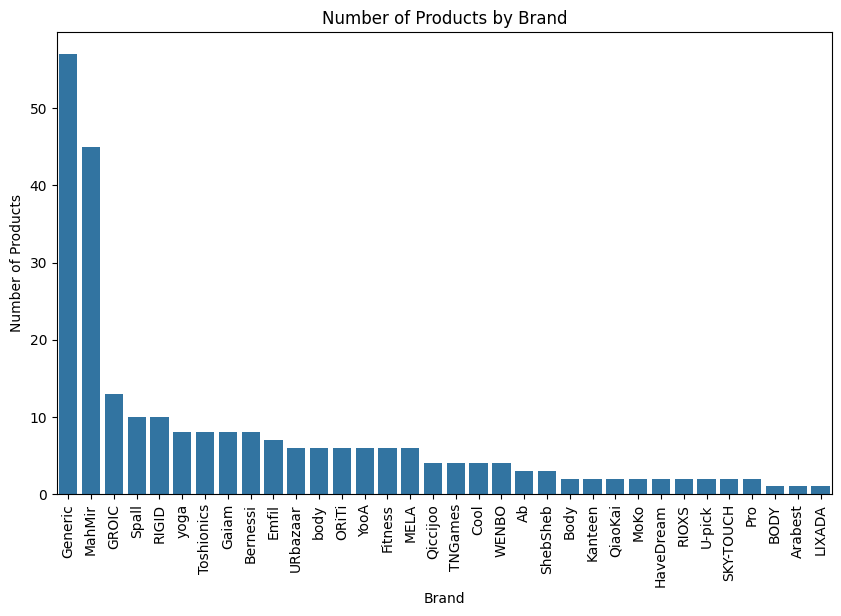

In [201]:
#plotting the number of products from each brand
plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values)
plt.xticks(rotation=90)
plt.title('Number of Products by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Products')
plt.show()